In [1]:
print("restnet18")
!python grid_search_pgd.py --load_path='resnet18/best_iter3_30e_64bs.pth' --layers=18 --noise_epochs=1 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet18/best_iter3_30e_64bs.pth' --layers=18 --noise_epochs=2 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet18/best_iter3_30e_64bs.pth' --layers=18 --noise_epochs=3 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet18/best_iter3_30e_64bs.pth' --layers=18 --noise_epochs=4 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet18/best_iter3_30e_64bs.pth' --layers=18 --noise_epochs=5 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009

print()
print()
print("restnet50")
!python grid_search_pgd.py --load_path='resnet50/best_iter3_30e_64bs.pth' --layers=50 --noise_epochs=1 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet50/best_iter3_30e_64bs.pth' --layers=50 --noise_epochs=2 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet50/best_iter3_30e_64bs.pth' --layers=50 --noise_epochs=3 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet50/best_iter3_30e_64bs.pth' --layers=50 --noise_epochs=4 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet50/best_iter3_30e_64bs.pth' --layers=50 --noise_epochs=5 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009

print()
print()
print("restnet152")
!python grid_search_pgd.py --load_path='resnet152/best_iter3_30e_64bs.pth' --layers=152 --noise_epochs=1 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet152/best_iter3_30e_64bs.pth' --layers=152 --noise_epochs=2 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet152/best_iter3_30e_64bs.pth' --layers=152 --noise_epochs=3 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet152/best_iter3_30e_64bs.pth' --layers=152 --noise_epochs=4 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009
!python grid_search_pgd.py --load_path='resnet152/best_iter3_30e_64bs.pth' --layers=152 --noise_epochs=5 --epsilon_steps=1 --epsilon_start=0.032 --epsilon_end=0.032 --alpha=0.009


restnet18
*** pgd grid search script ***
*** arguments: ***
Namespace(alpha=0.009, batch_size=64, clean_model=True, dry_run=False, epsilon_end=0.032, epsilon_start=0.032, epsilon_steps=1, layers=18, load_data=False, load_path='resnet18/best_iter3_30e_64bs.pth', lr=0.0003, model_type='', momentum=0.9, noise_epochs=1, save_path=None, train_epochs=10, train_val_ratio=0.99, weight_decay=1e-05)

*** iteration 0, epsilon = 0.03200 ***
==> Preparing data..
no. of train batch:  49500
no. of validation batch:  500
no. of test batch:  157
==> Building model..
==> Resuming from checkpoint  resnet18/best_iter3_30e_64bs.pth
==> Loaded model:  model=DataParallel, load_path=resnet18/best.pth, save_path=resnet18/best_iter3_30e_64bs.pth, batch_size=384, lr=7.00E-02, weigh_decay=1.00E-03, momentum=9.00E-01, train_val_ratio=9.90E-01, epsilon=3.00E-02, alpha=7.00E-03, num_iter=3
==> Test
[batch 156]     Loss: 2.809 | Acc: 37.420% (3742/10000): 100%|█| 157/157 [00:17<
*** end result ***
(0.032, {'average t

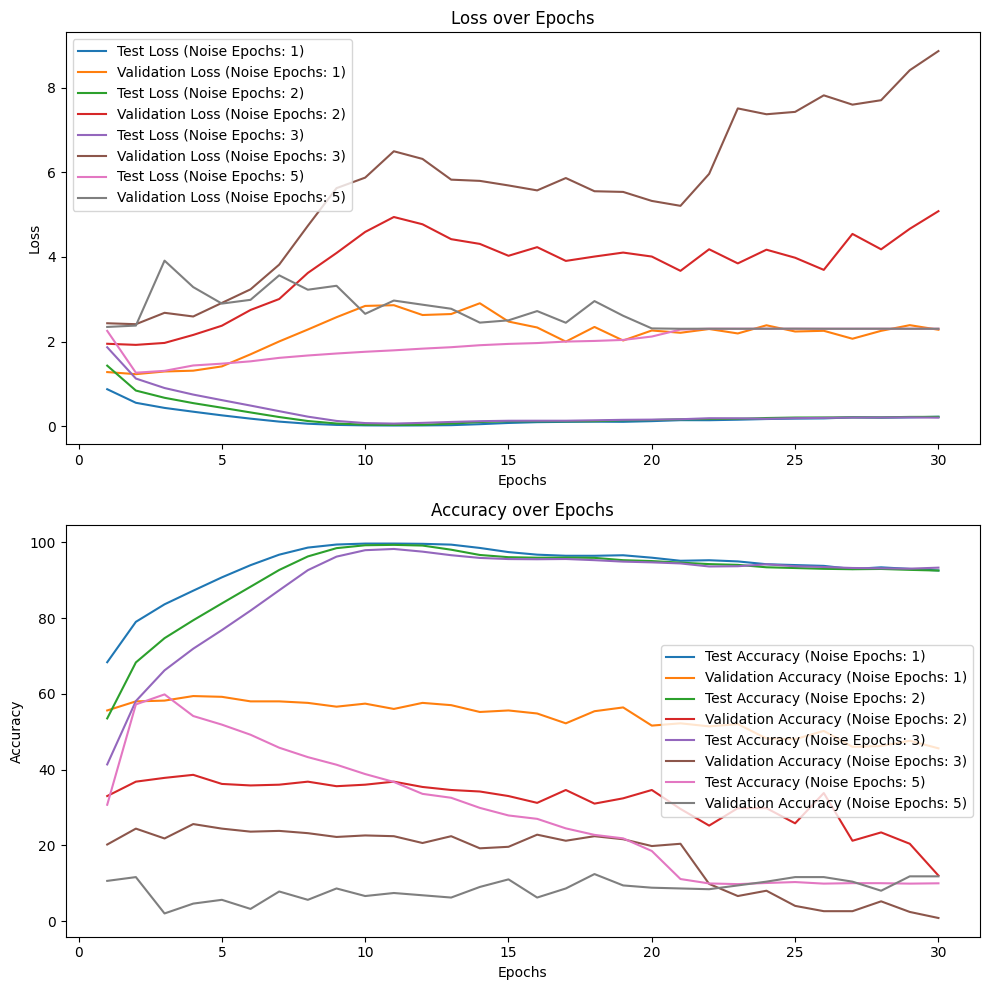

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('adversarial training log.csv')

# Filter the data
df = df[(df['Layer'] == 152) & (df['epoch_no'] <= 30)]

# Initialize the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Loop through the noise_epochs
for noise_epoch in [1, 2, 3, 5]:
    # Filter the data for the current noise_epoch
    df_filtered = df[df['noise_epochs'] == noise_epoch]
    
    # Plot the losses
    ax[0].plot(df_filtered['epoch_no'], df_filtered['test_loss'], label=f'Test Loss (Noise Epochs: {noise_epoch})')
    ax[0].plot(df_filtered['epoch_no'], df_filtered['val_loss'], label=f'Validation Loss (Noise Epochs: {noise_epoch})')
    
    # Plot the accuracies
    ax[1].plot(df_filtered['epoch_no'], df_filtered['test_accuracy'], label=f'Test Accuracy (Noise Epochs: {noise_epoch})')
    ax[1].plot(df_filtered['epoch_no'], df_filtered['val_accuracy'], label=f'Validation Accuracy (Noise Epochs: {noise_epoch})')

# Set the titles, labels, and legends
ax[0].set_title('Loss over Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].set_title('Accuracy over Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

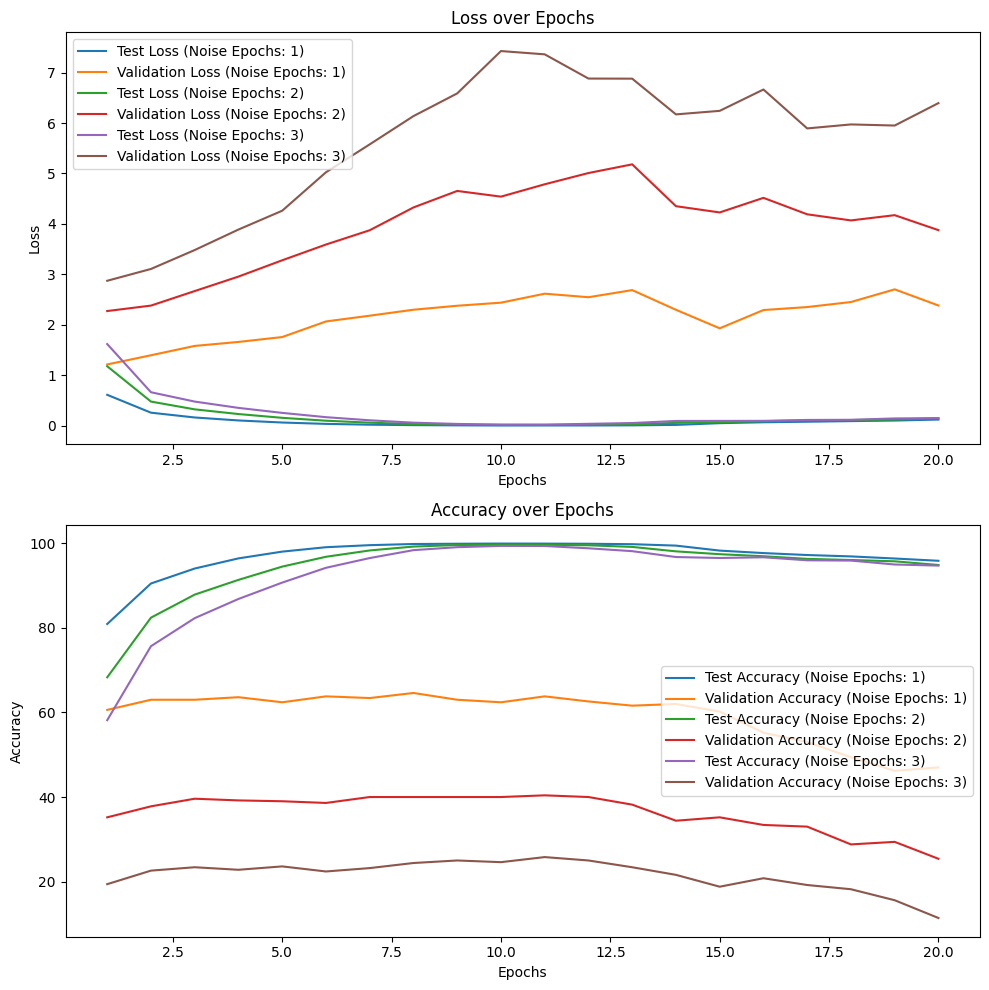

In [4]:
##layer 50 test loss val loss against epoch_no , add lines for noise_epoch 1, 2, 3
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('adversarial training log.csv')

# Initialize the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Filter the data for layer 50 and epochs less than or equal to 30
df_filtered_layer = df[(df['Layer'] == 50) & (df['epoch_no'] <= 30)]
    
# Loop through the noise_epochs
for noise_epoch in [1, 2, 3]:
    # Filter the data for the current noise_epoch
    df_filtered = df_filtered_layer[df_filtered_layer['noise_epochs'] == noise_epoch]
    
    # Plot the losses
    ax[0].plot(df_filtered['epoch_no'], df_filtered['test_loss'], label=f'Test Loss (Noise Epochs: {noise_epoch})')
    ax[0].plot(df_filtered['epoch_no'], df_filtered['val_loss'], label=f'Validation Loss (Noise Epochs: {noise_epoch})')
    
    # Plot the accuracies
    ax[1].plot(df_filtered['epoch_no'], df_filtered['test_accuracy'], label=f'Test Accuracy (Noise Epochs: {noise_epoch})')
    ax[1].plot(df_filtered['epoch_no'], df_filtered['val_accuracy'], label=f'Validation Accuracy (Noise Epochs: {noise_epoch})')

# Set the titles, labels, and legends
ax[0].set_title('Loss over Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].set_title('Accuracy over Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

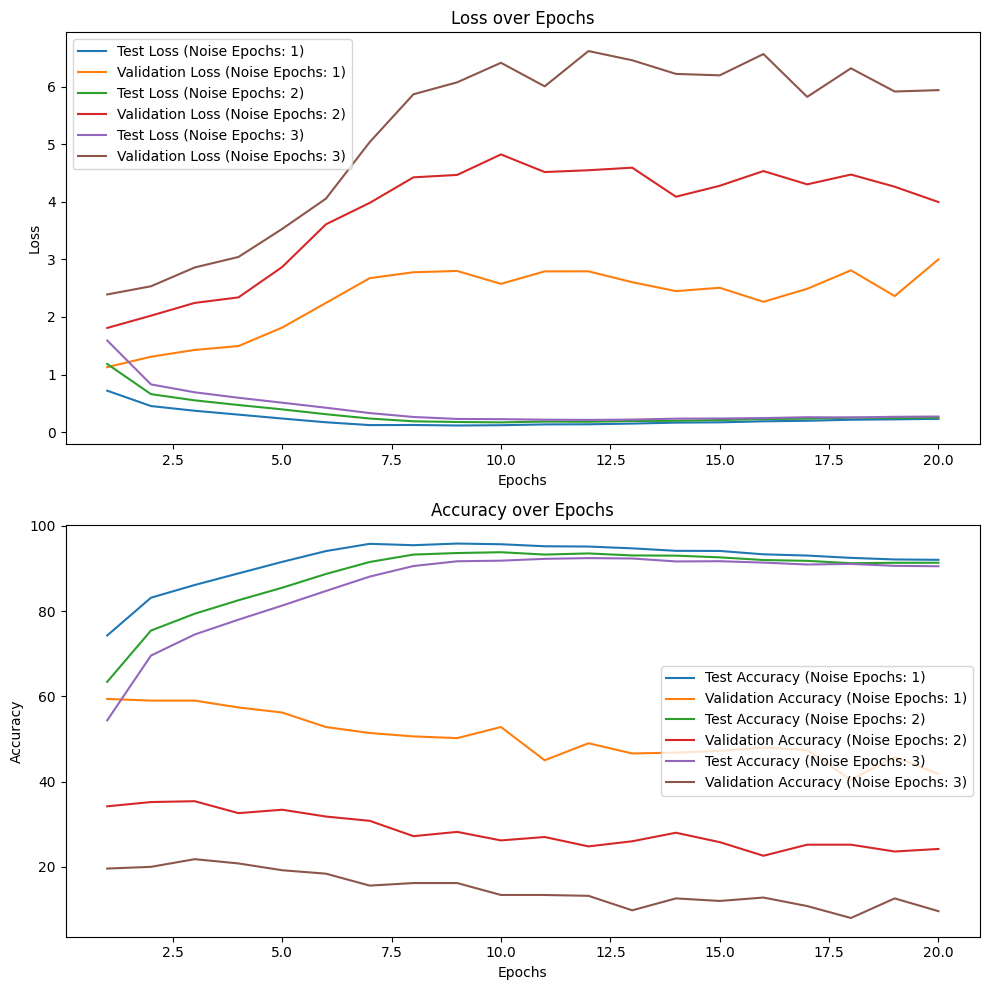

In [5]:
##layer 18 test loss val loss against epoch_no , add lines for noise_epoch 1, 2, 3
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('adversarial training log.csv')

# Initialize the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Filter the data for layer 18, epochs less than or equal to 30, and weight_decay equals 1e-3
df_filtered_layer = df[(df['Layer'] == 18) & (df['epoch_no'] <= 30) & (df['weight_decay'] == 1e-3)]
    
# Loop through the noise_epochs
for noise_epoch in [1, 2, 3]:
    # Filter the data for the current noise_epoch
    df_filtered = df_filtered_layer[df_filtered_layer['noise_epochs'] == noise_epoch]
    
    # Plot the losses
    ax[0].plot(df_filtered['epoch_no'], df_filtered['test_loss'], label=f'Test Loss (Noise Epochs: {noise_epoch})')
    ax[0].plot(df_filtered['epoch_no'], df_filtered['val_loss'], label=f'Validation Loss (Noise Epochs: {noise_epoch})')
    
    # Plot the accuracies
    ax[1].plot(df_filtered['epoch_no'], df_filtered['test_accuracy'], label=f'Test Accuracy (Noise Epochs: {noise_epoch})')
    ax[1].plot(df_filtered['epoch_no'], df_filtered['val_accuracy'], label=f'Validation Accuracy (Noise Epochs: {noise_epoch})')

# Set the titles, labels, and legends
ax[0].set_title('Loss over Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].set_title('Accuracy over Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

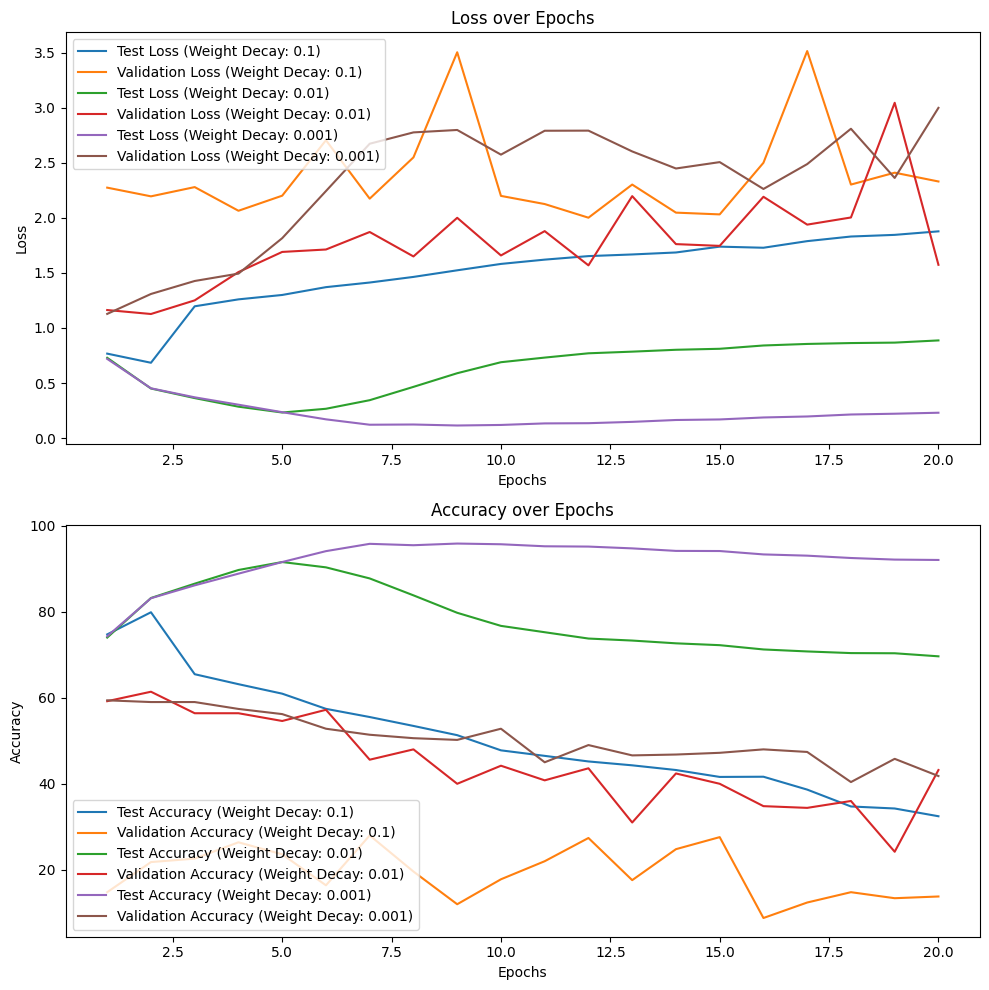

In [6]:
##layer 18 test loss val loss against epoch_no , add lines for different weighr decay
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('adversarial training log.csv')

# Initialize the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Filter the data for layer 18, epochs less than or equal to 30, and noise_epoch equals 1
df_filtered_layer = df[(df['Layer'] == 18) & (df['epoch_no'] <= 30) & (df['noise_epochs'] == 1)]
    
# Loop through the weight_decays
for weight_decay in [1e-1, 1e-2, 1e-3]:
    # Filter the data for the current weight_decay
    df_filtered = df_filtered_layer[df_filtered_layer['weight_decay'] == weight_decay]
    
    # Plot the losses
    ax[0].plot(df_filtered['epoch_no'], df_filtered['test_loss'], label=f'Test Loss (Weight Decay: {weight_decay})')
    ax[0].plot(df_filtered['epoch_no'], df_filtered['val_loss'], label=f'Validation Loss (Weight Decay: {weight_decay})')
    
    # Plot the accuracies
    ax[1].plot(df_filtered['epoch_no'], df_filtered['test_accuracy'], label=f'Test Accuracy (Weight Decay: {weight_decay})')
    ax[1].plot(df_filtered['epoch_no'], df_filtered['val_accuracy'], label=f'Validation Accuracy (Weight Decay: {weight_decay})')

# Set the titles, labels, and legends
ax[0].set_title('Loss over Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].set_title('Accuracy over Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
##adversarial trained model against normal model on attacked images

import pandas as pd

# Read the data
df = pd.read_csv('adversarial log.csv')

# Filter the data for alpha=0.009 and epsilon=0.032
df_filtered = df[(df['alpha'] == 0.009) & (df['epsilon'] == 0.032)]

# Pivot the dataframe to have 'adv_trained'=0 and 'adv_trained'=1 results in the same row
pivot_df = df_filtered.pivot_table(index=['Layer', 'noise_epochs', 'alpha', 'epsilon'], 
                                   columns='adv_trained', 
                                   values=['average test loss', 'accuracy'])

# Flatten the column Index
pivot_df.columns = ['_'.join(str(c) for c in col) for col in pivot_df.columns]

# Convert accuracies to percentages
pivot_df['accuracy_0'] = pivot_df['accuracy_0']*100
pivot_df['accuracy_1'] = pivot_df['accuracy_1']*100

# Rename the columns
pivot_df.rename(columns={'accuracy_1': 'accuracy_advtrained', 'average test loss_1': 'average test loss_advtrained'}, inplace=True)

# Reset the index
pivot_df = pivot_df.reset_index()


print("Comparison of performance on attacked images with and without adversarial training:\n")

# Print the pivot table
print(pivot_df)

##adversarial trained model against normal model on normal images

Comparison of performance on attacked images with and without adversarial training:

    Layer  noise_epochs  alpha  epsilon  accuracy_0  accuracy_advtrained  \
0      18             1  0.009    0.032       33.65                37.42   
1      18             2  0.009    0.032        7.66                14.33   
2      18             3  0.009    0.032        2.15                 5.27   
3      18             4  0.009    0.032        1.21                 2.61   
4      18             5  0.009    0.032        0.94                 2.08   
5      50             1  0.009    0.032       38.58                43.07   
6      50             2  0.009    0.032       10.89                19.45   
7      50             3  0.009    0.032        3.09                 8.53   
8      50             4  0.009    0.032        1.23                 4.13   
9      50             5  0.009    0.032        0.64                 2.47   
10    152             1  0.009    0.032       39.14                17.34   
11 